# Uso del Caos para Transmitir Mensajes Encriptados

In [1]:
using ChaosCrypto

### Ecuaciones de Lorenz

$\frac{dx}{dt}= \sigma (y - x)$

$\frac{dy}{dt} = rx -y -xz$

$\frac{dz}{dt} = xy -bz$

Si *x(t)* es la señal que se transmite.
Lo que se recibe es:

$xr = x(t)$

$yr = rx(t) -yr -x(t)zr$

$zr = x(t)yr -bzr$

In [2]:
using PyPlot

Parámetros

r = 60 

σ = 10

b = $\frac{8}{3}$

In [3]:
#Implementación Taylor

In [4]:
function runge2(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+2dt*k1/3, t+2*dt/3)
    (k1/4+3k2/4)
end

runge2 (generic function with 1 method)

In [5]:
f(x) = x^2

f (generic function with 1 method)

In [6]:
runge2()

LoadError: LoadError: MethodError: `runge2` has no method matching runge2()
while loading In[6], in expression starting on line 1

In [7]:
function runge2(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+2dt*k1/3, t+2*dt/3)
    (k1/4+3k2/4)
end

function runge4(f,x,t,dt) 
    k1 = f(x,t)
    k2 = f(x+dt*k1/2, t+dt/2)
    k3 = f(x+dt*k2/2,t+dt/2)
    k4 = f(x+dt*k3,t + dt)
    (k1+2k2+2k3+k4)/6
end

function superrunge(f,x,t,dt)
    x1x,u1x,x1y,u1y,x2x,u2x,x2y,u2y = x
    normi = ((x1x-x2x)^2+(x1y-x2y)^2)^(-3/2)
    if normi < 1e-3
        return "fin"
    else
        k1 = f(x,t)
        k2 = f(x+dt*k1/2, t+dt/2)
        k3 = f(x+dt*k2/2,t+dt/2)
        k4 = f(x+dt*k3,t + dt)
        (k1+2k2+2k3+k4)/6
    end
end

function integrar(f, x0, t0, t_final, dt, metodo = 4)
    # necesito una function f(x,t)
    # que come un vector x, el tiempo t
    # y regresa un vector (el campo vectorial evaluado en x,t)
    
    tiempos = [t0]
    xs = typeof(x0)[x0]

    #x = copy(x0)  # ver pythontutor.com
    
    x = x0
    
    for t in t0:dt:t_final
        if metodo == 1
            k = f(x,t)
        elseif metodo == 2
            k = runge2(f,x,t,dt)
        elseif metodo == 4
            k = runge4(f,x,t,dt)
        elseif metodo == 20
            k = superrunge(f,x,t,dt)
            if k == "fin"
                return xs, tiempos
            end
        else
            error("Los únicos métodos son 1 2 ó 4")
        end
        x_nueva = x + dt*k
        
        push!(xs, x)
        push!(tiempos, t)
        
        x = x_nueva
        
    end
    
    xs, tiempos
end



integrar (generic function with 2 methods)

In [8]:
ρ = 60
σ = 10
β = 8/3

2.6666666666666665

In [9]:
?push!



search: 

```rst
..  push!(collection, items...) -> collection

Insert one or more ``items`` at the end of ``collection``.

.. doctest::

  julia> push!([1, 2, 3], 4, 5, 6)
  6-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6

Use :func:`append!` to add all the elements of another collection to
``collection``.
The result of the preceding example is equivalent to
``append!([1, 2, 3], [4, 5, 6])``.
```


In [62]:
function m(t) #Función seno en el tiempo
    t = linspace(0, 2π, 360)
    h = Array(t)
    #m = zeros(360)
    s=Array(Float64,360)
    for i in 0:360
    s[i] = sin(t[i])
    end
    
    push!(s) 
end
    

m (generic function with 1 method)

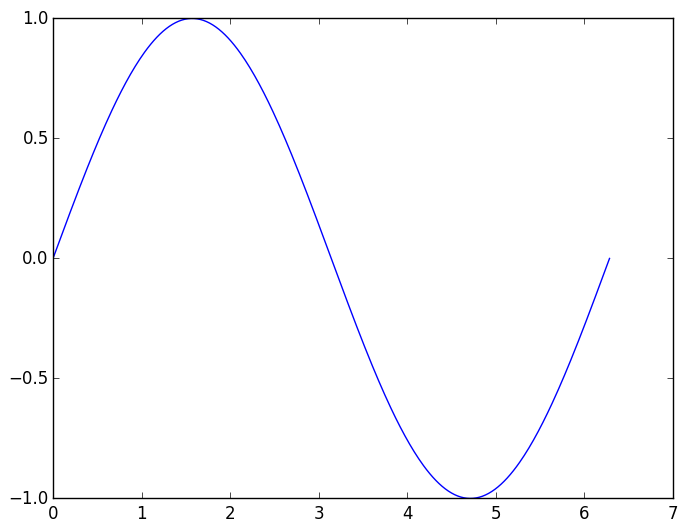

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320397510>

In [67]:
plot(t,s)

In [41]:
t = linspace(0, 2π, 360)
h = Array(t)

360-element Array{Float64,1}:
 0.0      
 0.0175019
 0.0350038
 0.0525057
 0.0700076
 0.0875095
 0.105011 
 0.122513 
 0.140015 
 0.157517 
 0.175019 
 0.192521 
 0.210023 
 ⋮        
 6.09066  
 6.10817  
 6.12567  
 6.14317  
 6.16067  
 6.17817  
 6.19568  
 6.21318  
 6.23068  
 6.24818  
 6.26568  
 6.28319  

In [61]:
sin(0.0350038)

0.034996652276821125

In [59]:
s=Array(Float64,360)
for i in 1:360
    s[i] = sin(t[i])
    end
    
push!(s) 

360-element Array{Float64,1}:
  0.0        
  0.017501   
  0.0349967  
  0.0524816  
  0.0699505  
  0.0873979  
  0.104819   
  0.122207   
  0.139558   
  0.156867   
  0.174127   
  0.191334   
  0.208482   
  ⋮          
 -0.191334   
 -0.174127   
 -0.156867   
 -0.139558   
 -0.122207   
 -0.104819   
 -0.0873979  
 -0.0699505  
 -0.0524816  
 -0.0349967  
 -0.017501   
 -2.44929e-16

 in depwarn at deprecated.jl:73
 in push! at deprecated.jl:439
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/Yuriko/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/Yuriko/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[59], in expression starting on line 6


In [38]:
typeof(ans)

DataType

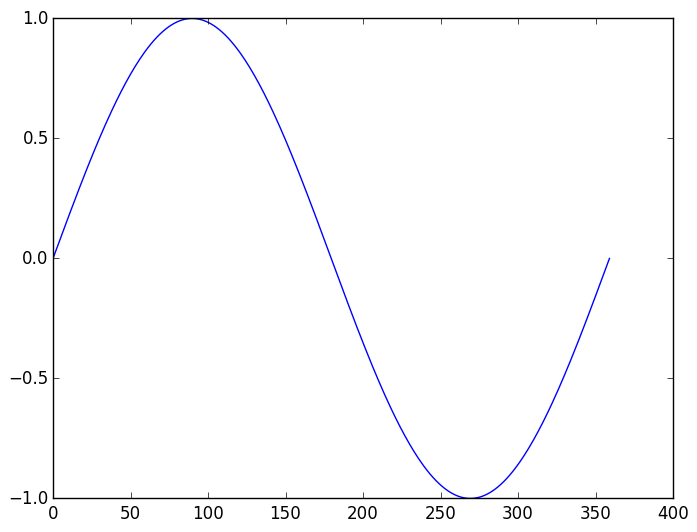

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f8b3810>

In [23]:
plot(sin(t))
plot(0)

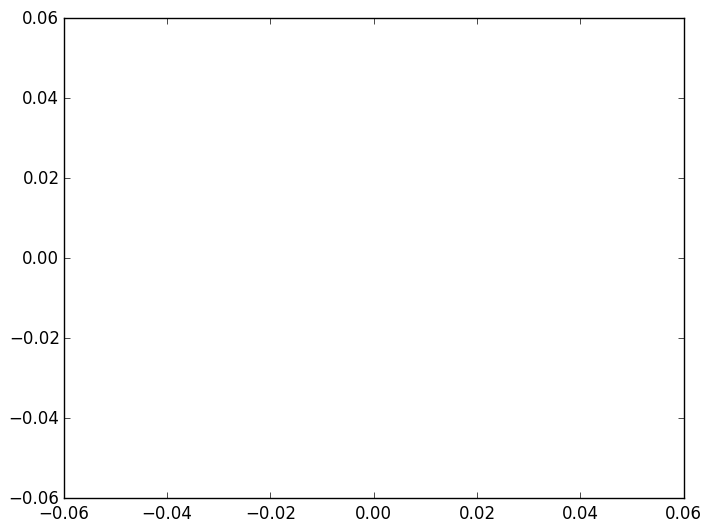

0-element Array{Any,1}

In [34]:
plot()

In [12]:
hi = linspace(0.0, 6, 300)
#h = 10.0.^(hi)


linspace(0.0,6.0,300)

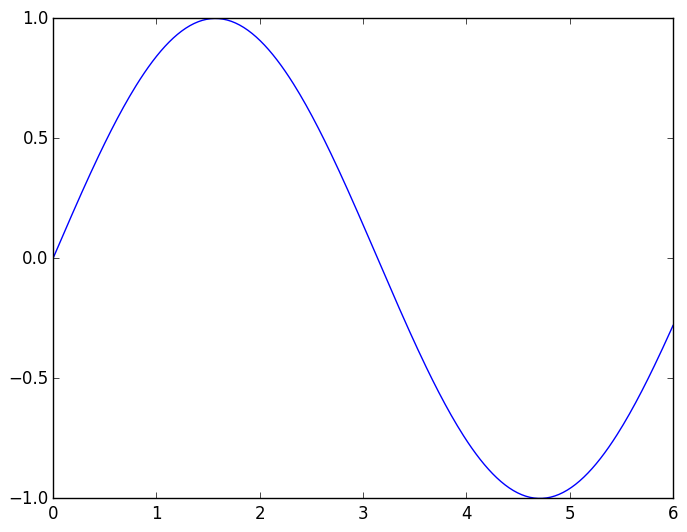

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ebb1e90>

In [13]:
plot(hi, sin(hi))

In [14]:
i= linspace(0, 360, 100)

linspace(0.0,360.0,100)

In [68]:
function lorenzSinTaylor(xx,t)
    x, y, z, xr, yr, zr = xx
    
    #m = sin(t)
    #s = x + m
    
    [AD.Taylor(x, [σ]) * (AD.Taylor(x, [y]) - AD.Taylor(x, [x])),
    (AD.Taylor(y, [ρ]) * AD.Taylor(y, [x])) - AD.Taylor(y,[y]) - (AD.Taylor(y, [x]) * AD.Taylor(y, [z])), 
    (AD.Taylor(z, [x]) * AD.Taylor(z, [y])) - (AD.Taylor(z, [β]) * AD.Taylor(z, [z])),
    AD.Taylor(xr, [σ]) * (AD.Taylor(xr, [yr]) - AD.Taylor(xr, [xr])),
        (AD.Taylor(yr, [ρ]) * AD.Taylor(yr, [x + m])) - AD.Taylor(yr, [yr]) - (AD.Taylor(yr, [x + m]) * AD.Taylor(yr, [zr])),
        (AD.Taylor(zr, [x + m]) * AD.Taylor(zr, [yr])) -  (AD.Taylor(zr, [β]) * AD.Taylor(zr, [zr]))]
end

lorenzSinTaylor (generic function with 1 method)

In [69]:
xsSinTaylor, tsSinTaylor = LO.integrador([1.0,1.0,1.0,1.0,1.0,1.0], lorenzSinTaylor, 30.0)

LoadError: LoadError: DimensionMismatch("arrays could not be broadcast to a common size")
while loading In[69], in expression starting on line 1

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:32
 in lorenzSinTaylor at In[68]:7
 in integrador at /Users/Yuriko/ChaosCrypto.jl/src/Lorenz.jl:52
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/Yuriko/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/Yuriko/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[69], in expression starting on line 1


In [17]:
using PyPlot